# Batch 18

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np 
import re
sns.set(rc={'figure.figsize':(18.7,12.27)})

In [2]:
lib_trans=pd.read_excel('issue_records.xlsx')
exam_cell = pd.read_excel('exam_cell_data.xlsx',index_col=0)
sub_code = pd.read_csv('mech.csv')

In [3]:
def assign_semester_lib(lib_data):
    lib_data=lib_data[lib_data['year'].isin([18])]
    lib_data.set_index(lib_data['issue_dt'],inplace=True)
    lib_sem1 = lib_data['2018-08-20':'2019-01-11']
    lib_sem1['semester'] = 1
    lib_sem2 = lib_data['2019-01-21':'2019-05-20']
    lib_sem2['semester'] = 2
    lib_sem3 = lib_data['2019-06-24':'2019-11-16']
    lib_sem3['semester'] = 3
    lib_frames = [lib_sem1,lib_sem2,lib_sem3]
    lib_transaction = pd.concat(lib_frames)
    lib_transaction['book_id'] = lib_transaction.groupby('title').ngroup()
    lib_transaction.drop(columns=['Unnamed: 0'],inplace=True)
    return lib_transaction

In [4]:
lib = assign_semester_lib(lib_data=lib_trans)

In [5]:
lib

,id,level,dept,year,section,access_no,title,issue_dt,due_dt,return_dt,doc,semester,book_id
issue_dt,,,,,,,,,,,,,
2018-09-15,X6elhBUk,B,ME,18,1,G22740,TRANSFORMS AND PARTIAL DIFFERENTIAL EQUATIONS,2018-09-15,2018-09-29,2018-09-29,BOOK,1,200
2018-09-15,X6elhBUk,B,ME,18,1,G23614,TEXTBOOK OF FLUID MECHANICS AND HYDRAULIC MACH...,2018-09-15,2018-09-29,2018-09-29,BOOK,1,174
2018-10-09,X6elhBUk,B,ME,18,1,G30499,TRANSFORMS AND PARTIAL DIFFERENTIAL EQUATIONS,2018-10-09,2018-10-23,2018-10-25,BOOK,1,200
2018-10-27,X6elhBUk,B,ME,18,1,G22740,TRANSFORMS AND PARTIAL DIFFERENTIAL EQUATIONS,2018-10-27,2018-11-10,2018-11-09,BOOK,1,200
2018-10-27,X6elhBUk,B,ME,18,1,G23614,TEXTBOOK OF FLUID MECHANICS AND HYDRAULIC MACH...,2018-10-27,2018-11-10,2018-11-09,BOOK,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-18,y7T1uqhG,B,ME,18,1,42309,DESIGN DATA : DATA BOOK OF ENGINEERS,2019-09-18,2019-10-02,1800-01-01,BOOK,3,37
2019-10-03,ZUD9PgdX,B,ME,18,1,42308,DESIGN DATA : DATA BOOK OF ENGINEERS,2019-10-03,2019-10-17,2019-10-12,BOOK,3,37
2019-10-24,ZUD9PgdX,B,ME,18,1,42525,DESIGN DATA : DATA BOOK OF ENGINEERS,2019-10-24,2019-11-07,2019-11-05,BOOK,3,37


In [19]:
def assign_subjectcode(data,sub_code,exam_data):
    data.set_index(data['issue_dt'],inplace=True)
    chemistry = data[data['title'].str.contains('CHEMISTRY')==True]
    chemistry['subjectcode'] = '16CYT11'
    physics = data[data['title'].str.contains('PHYSICS')==True]
    physics['subjectcode'] = '16PHT11'
    maths1 = data[data['title'].str.contains('ENGINEERING MATHEMATICS')==True]
    maths1['subjectcode'] = '16MAT11'
    maths2 = data[data['title'].str.contains('ENGINEERING MATHEMATICS II')==True]
    maths2['subjectcode'] = '16MAT21'
    Communication_skills1 = data[data['title'].str.contains('COMMUNICATION')==True]
    Communication_skills1['subjectcode'] = '16ENT11'
    Communication_skills2 = data[data['title'].str.contains('COMMUNICATION')==True]
    Communication_skills2['subjectcode'] = '16ENT21'
    material_science = data[data['title'].str.contains('MATERIAL SCIENCE')==True]
    material_science['subjectcode'] =  '16PHT21'
    engineering_mechanics = data[data['title'].str.contains('ENGINEERING MECHANICS')          ==True]
    engineering_mechanics['subjectcode'] = '16GET21'
    metrology = data[data['title'].str.contains('METROLOGY')==True]
    metrology['subjectcode'] = '16GET22'
    tpde = data[data['title'].str.contains('DIFFERENTIAL')==True]
    tpde['subjectcode'] = '16MAT31'
    thermodynamics = data[data['title'].str.contains('THERMODYNAMICS')==True]
    thermodynamics['subjectcode'] = '16AUT31'
    fluid_mech = data[data['title'].str.contains('FLUID MECHANICS')==True]
    fluid_mech['subjectcode'] = '16AUT32'
    theory_machines1 = data[data['title'].str.contains('THEORY OF MACHINES')==True]
    theory_machines1['subjectcode'] = '16MET33'
    theory_machines2 = data[data['title'].str.contains('THEORY OF MACHINES II')==True]
    theory_machines2['subjectcode'] = '16MET43'
    metallurgy = data[data['title'].str.contains('METALLURGY')==True]
    metallurgy['subjectcode'] = '16MET31'
    mfj = data[data['title'].str.contains('MANUFACTURING PROCESS')==True]
    mfj['subjectcode'] = '16MET32'
    m4 = data[data['title'].str.contains('NUMERICAL METHODS')==True]
    m4['subjectcode'] = '16MAT41'
    c_prog = data[data['title'].str.contains('PROGRAMMING')==True]
    c_prog['subjectcode'] = '16CST46'
    som = data[data['title'].str.contains('STRENGTH OF MATERIALS')==True]
    som['subjectcode'] = '16MET41'
    mcp = data[data['title'].str.contains('METAL CUTTING')==True]
    mcp['subjectcode'] = '16MET42'
    edc = data[data['title'].str.contains('ELECTRICAL DRIVES')==True]
    edc['subjectcode'] = '16EET45'
    dom = data[data['title'].str.contains('DESIGN OF MACHINE ELEMENTS')==True]
    dom['subjectcode'] = '16MET51'
    design_data = data[data['title'].str.contains('DESIGN DATA')==True]
    design_data['subjectcode'] = '16MET51-16MET61'
    thermal = data[data['title'].str.contains('THERMAL')==True]
    thermal['subjectcode'] = '16MET52'
    auto = data[data['title'].str.contains('AUTOMOBILE')==True]
    auto['subjectcode'] = '16MET54'
    micro_cont = data[data['title'].str.contains('MICROCONTROLLER')==True]
    micro_cont['subjectcode'] = '16ECT56'
    fea = data[data['title'].str.contains('FINITE')==True]
    fea['subjectcode'] = '16MET61'
    transmission = data[data['title'].str.contains('DESIGN OF TRANSMISSION')==True]
    transmission['subjectcode'] = '16MET62'
    hmt = data[data['title'].str.contains('HEAT')==True]
    hmt['subjectcode'] = '16MET63'
    powerplant = data[data['title'].str.contains('POWER PLANT')==True]
    powerplant['subjectcode'] = '16MET64'
    mechatronics = data[data['title'].str.contains('MECHATRONICS')==True]
    mechatronics['subjectcode'] = '16MET71'
    evs = data[data['title'].str.contains('ENVIRONMENTAL')==True]
    evs['subjectcode'] = '16CET73'
    frames = [chemistry,physics,material_science,engineering_mechanics,metrology,tpde,maths1,maths2,Communication_skills1,Communication_skills2,theory_machines1,theory_machines2,      thermodynamics,fluid_mech,metallurgy,mfj,m4,c_prog,som,mcp,edc,dom,thermal,auto,        micro_cont,fea,transmission,hmt,powerplant,mechatronics,evs]
    new_data = pd.concat(frames)
    sub_code.rename(columns={'Course code':'subjectcode','title':'course_title'},           inplace=True)
    lib_merged = pd.merge(new_data,sub_code,on='subjectcode',how='inner')
    design_data['subjectcode'] = '16MET51-16MET61'
    design_data['course_title'] = 'Design data Book'
    # frames2 = [maths,theory_machines,Communication_skills,design_data]
    # lib_merged = lib_merged.append(frames2)
    # lis = exam_data['id']
    # lib_merged = lib_merged[lib_merged['id'].isin(lis)]
    return lib_merged

In [20]:
new_lib = assign_subjectcode(data=lib,sub_code=sub_code,exam_data=exam)

In [21]:
new_lib

,id,level,dept,year,section,access_no,title,issue_dt,due_dt,return_dt,doc,semester,book_id,subjectcode,course_title
0,Kka2Da8t,B,ME,18,1,15196,ENGINEERING CHEMISTRY : CHEMISTRY OF ENGINEERI...,2018-09-26,2018-10-10,2018-10-10,BOOK,1,48,16CYT11,Applied Chemistry
1,Yib1Qxml,B,ME,18,0,4638,TEXTBOOK OF ENGINEERING CHEMISTRY,2018-09-26,2018-10-10,2018-10-09,BOOK,1,163,16CYT11,Applied Chemistry
2,Yib1Qxml,B,ME,18,0,15203,ENGINEERING CHEMISTRY : CHEMISTRY OF ENGINEERI...,2018-10-09,2018-10-23,2018-10-25,BOOK,1,49,16CYT11,Applied Chemistry
3,UeQadhuQ,B,ME,18,1,22697,ENGINEERING CHEMISTRY : CHEMISTRY OF ENGINEERI...,2018-09-26,2018-10-10,2018-10-09,BOOK,1,47,16CYT11,Applied Chemistry
4,UeQadhuQ,B,ME,18,1,38420,ENGINEERING CHEMISTRY,2018-10-09,2018-10-23,2018-10-22,BOOK,1,44,16CYT11,Applied Chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,BFeoXlUu,B,ME,18,1,32120,MECHATRONICS : A MULTIDISCIPLINARY APPROACH,2019-10-09,2019-10-23,2019-10-25,BOOK,3,120,16MET71,'Mechatronics
429,4yjyNeNE,B,ME,18,0,38180,MECHATRONICS,2019-10-22,2019-11-05,2019-11-02,BOOK,3,119,16MET71,'Mechatronics
430,4yjyNeNE,B,ME,18,0,38178,MECHATRONICS,2019-11-09,2019-11-23,2019-11-19,BOOK,3,119,16MET71,'Mechatronics
431,j8SWqd4P,B,ME,18,0,38175,MECHATRONICS,2019-10-22,2019-11-05,2019-11-05,BOOK,3,119,16MET71,'Mechatronics


In [26]:
def mean_score(lib_data,exam_data):
    class_mean_per_sem_subject = pd.DataFrame()
    # class_mean_per_sem_subject['mean_score_sec'] = exam_data.groupby(['section','semester','subjectcode'])['total'].mean()
    class_mean_per_sem_subject['library_id_frequency'] = lib_data.groupby(['section','semester','subjectcode'])['id'].count()
    class_mean_per_sem_subject.reset_index(inplace=True)
    # course_mean_per_sem = pd.DataFrame()
    # course_mean_per_sem['course_mean_score'] = exam_data.groupby(['section','semester','subjectcode'])['total'].mean()
    # course_mean_per_sem['library_freq_course_by_id'] = lib_data.groupby(['section','semester','subjectcode'])['id'].count()
    # course_mean_per_sem.reset_index(inplace=True)
    return class_mean_per_sem_subject

In [27]:
class_mean_score = mean_score(lib_data=new_lib,exam_data=exam)

In [28]:
class_mean_score['section'].replace(to_replace=0,value='A',inplace=True)
class_mean_score['section'].replace(to_replace=1,value='B',inplace=True)

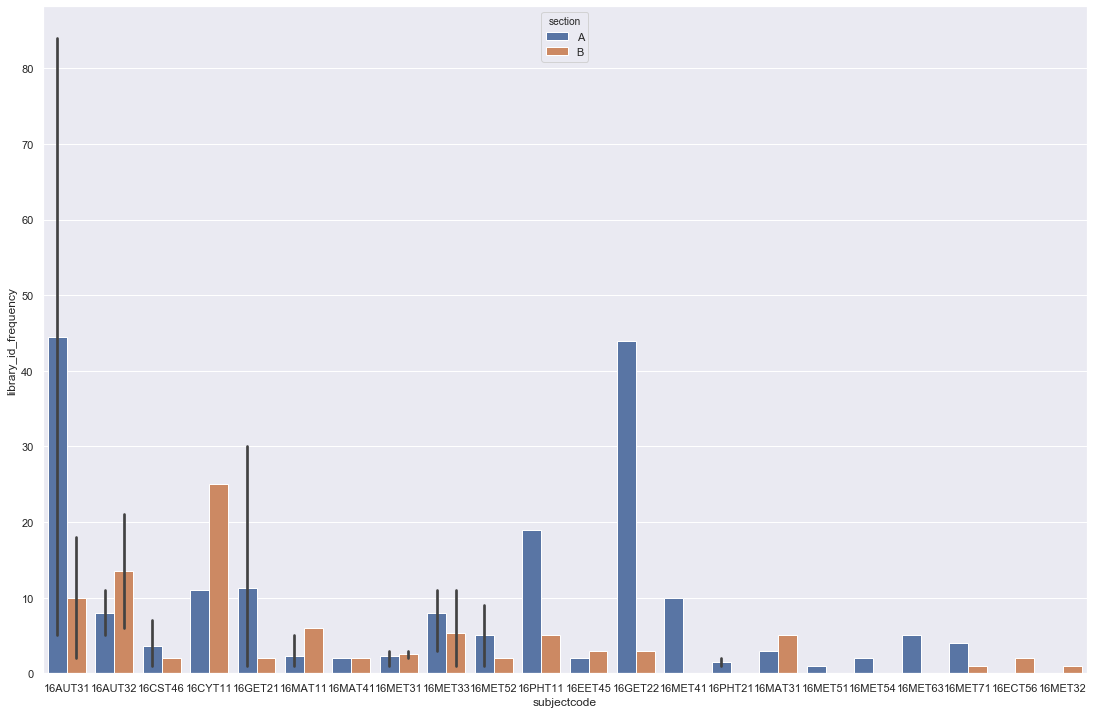

In [32]:
sns.barplot(class_mean_score['subjectcode'],class_mean_score['library_id_frequency'],hue='section',data=class_mean_score)

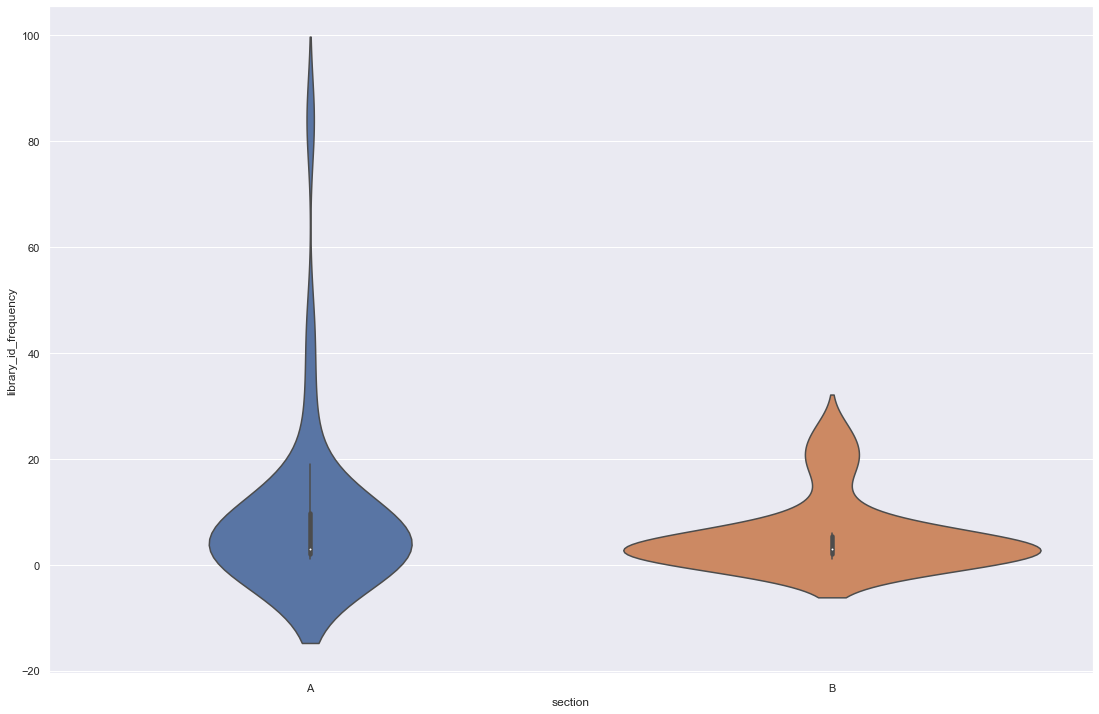

In [41]:
sns.violinplot(class_mean_score['section'],class_mean_score['library_id_frequency'],data=class_mean_score)

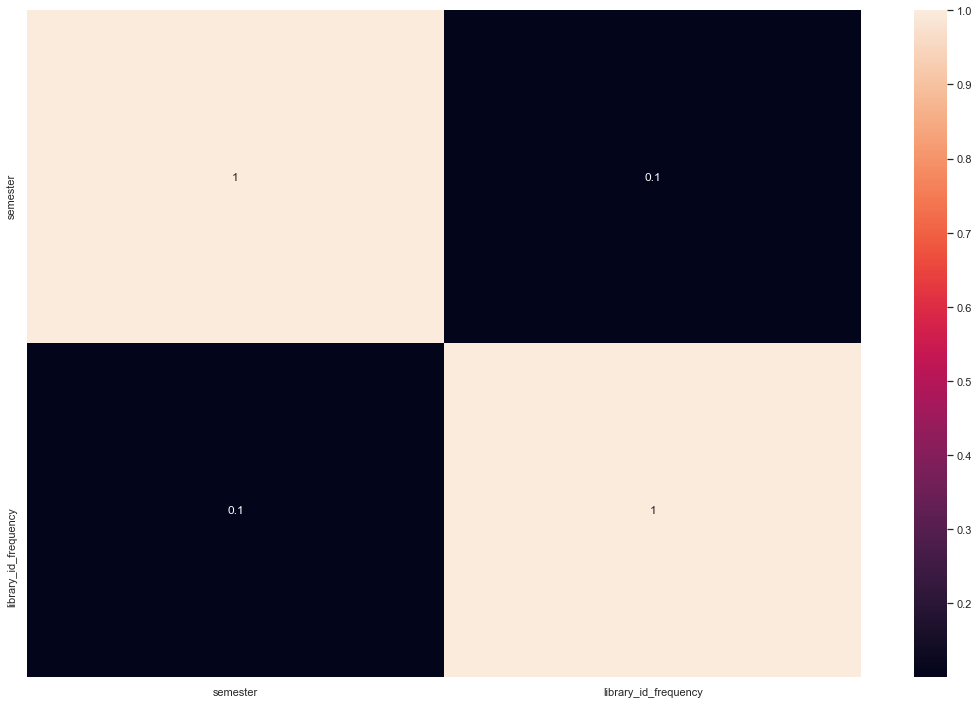

In [33]:
sns.heatmap(class_mean_score.corr(method='pearson'),annot=True)

In [14]:
def plotting(exam_cell,class_mean,course_mean):
    sem1 = exam[exam['semester']==1]
    sem2 = exam[exam['semester']==2]
    sem3 = exam[exam['semester']==3]
    sem4 = exam[exam['semester']==4]
    sem5 = exam[exam['semester']==5]
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem1)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem2)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem3)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem4)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem5)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem6)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem7)
    # sns.heatmap(data=class_mean.corr(method='pearson'),annot=True)
    # sns.heatmap(data=course_mean.corr(method='pearson'),annot=True)

    return sns.heatmap(data=course_mean.corr(method='pearson'),annot=True)